# Understanding Error Optimization using Gradient Descent

Gradient Descent is used for multiple Linear Regression, so there will be more than one feature.

First we will use dummy data to understand the concept and create an algorithm.

In [1]:
#Two Random Features
x1 = 5
x2 = 8
#Target Variable
Y = 89

In [2]:
#First we will assign random values to the coefficients of x1 and x2
m1 = 3.2
m2 = 0.4

In [3]:
#Equation of our line
Yp = m1*x1 + m2*x2
Yp

19.2

Clearly Yp (our prediction) is not equal to Y (true value)

In [4]:
#Calculate the error
(Y-Yp)**2

4872.04

We will generate partial derivatives w.r.t. m1 and m2 >> subtract them from assumed m1 and m2 >> replace with m1 and m2

In [5]:
dem1 = 2*(Y-Yp)*(-x1) #partial derivative of x1
dem2 = 2*(Y-Yp)*(-x2) #partial derivative of x2

In [6]:
#m1 = m1 - partial derivative of x1 w.r.t. m1
m1 = m1 - 0.001*dem1
#m2 = m2 - partial derivative of x2 w.r.t. m2
m2 = m2 - 0.001*dem2

0.001 - learning rate - take small steps and check the error

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are update

In [7]:
#Calculate the error using the updated coefficients
Yp = m1*x1 + m2*x2
print((Y-Yp)**2)

3291.95947536


We can see that the error dropped from 4872.04 to 3291.95 in a single step.

# Create the algorithm

In [8]:
x1 = 5
x2 = 8
Y = 89
m1 = 3.2
m2 = 0.4

In [9]:
error_values=[]
for i in range(0,30):
  Yp = m1*x1 + m2*x2
  dem1 = 2*(Y-Yp)*(-x1)
  dem2 = 2*(Y-Yp)*(-x2)
  m1 = m1 - 0.001*dem1
  m2 = m2 - 0.001*dem2
  e = (Y-Yp)**2
  error_values.append(e)
  print('m1: ',m1,'m2: ',m2,'Yp: ',Yp,'error: ',e)

m1:  3.898 m2:  1.5168 Yp:  19.2 error:  4872.04
m1:  4.471756 m2:  2.4348096 Yp:  31.6244 error:  3291.95947536
m1:  4.943383432 m2:  3.1894134912 Yp:  41.8372568 error:  2224.3243461491465
m1:  5.331061181104 m2:  3.8096978897664 Yp:  50.2322250896 error:  1502.9403715034398
m1:  5.6497322908674885 m2:  4.319571665387981 Yp:  57.1328890236512 error:  1015.51276197893
m1:  5.911679943093076 m2:  4.73868790894892 Yp:  62.80523477744129 error:  686.1657250649712
m1:  6.127000913222509 m2:  5.083201461156012 Yp:  67.46790298705675 error:  463.6312017747998
m1:  6.3039947506689025 m2:  5.366391601070242 Yp:  71.30061625536064 error:  313.2681849400041
m1:  6.449483685049838 m2:  5.599173896079739 Yp:  74.45110656190644 error:  211.67030027300177
m1:  6.569075589110967 m2:  5.790520942577545 Yp:  77.0408095938871 error:  143.02223516966274
m1:  6.667380134249215 m2:  5.947808214798742 Yp:  79.1695454861752 error:  96.63783594837848
m1:  6.748186470352855 m2:  6.077098352564565 Yp:  80.9193

We can see how the error drops from 4872.04 to 0.05 in 30 steps

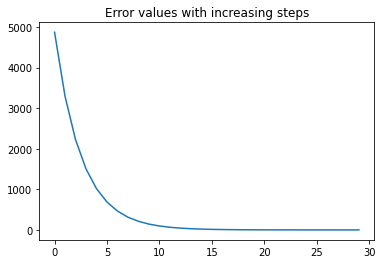

In [10]:
import matplotlib.pyplot as plt
plt.plot(error_values)
plt.title("Error values with increasing steps")
plt.show()

We can see that for the first 10 steps the error reduces drastically and after that the error reduces very slowly.

# Working with Actual Dataset

In [11]:
import pandas as pd
df = pd.read_csv('dataset.csv',header = None) #read the dataset
df.head(5)

,0,1
0,-10.0,-400.298943
1,-9.9,-390.568974
2,-9.8,-364.284896
3,-9.7,-355.562114
4,-9.6,-337.946480


In [12]:
df.shape

(201, 2)

In [13]:
import numpy as np
x0 = np.ones([201,1])
x1 = df[[0]]
y = df[[1]]

ACTUALLY WE ARE USING POLYNOMIAL REGRESSION TO UNDERSTAND GRADIENT DESCENT

In [14]:
X = np.hstack((x0 , x1 , x1**2 , x1**3)) #generate the features for the dataset

In [15]:
#generate random coefficients
m = np.array([np.random.randn(1) , np.random.randn(1) , np.random.randn(1) , np.random.randn(1)]) 
m

array([[ 2.01090031],
       [ 1.04330506],
       [-0.57685775],
       [ 1.04809016]])

In [16]:
Yp = np.dot(X,m) #dot product of X(features) and m(coefficients)

In [17]:
((y - Yp)**2).mean() #check error

1    51890.510515
dtype: float64

In [18]:
#generate partial derivatives
dem0 = 2 * np.dot((y-Yp).T ,(-X[:,0:1]))
dem1 = 2 * np.dot((y-Yp).T ,(-X[:,1:2]))
dem2 = 2 * np.dot((y-Yp).T ,(-X[:,2:3]))
dem3 = 2 * np.dot((y-Yp).T ,(-X[:,3:4]))

In [19]:
#update the coefficients
m[0][0] = m[0][0] - 0.00001 * dem0
m[1][0] = m[1][0] - 0.0000001 * dem1
m[2][0] = m[2][0] - 0.0000001 * dem2
m[3][0] = m[3][0] - 0.00000001 * dem3

In [20]:
#get dot product and check error
Yp = np.dot(X,m)
((y - Yp)**2).mean()

1    12179.552367
dtype: float64

In [21]:
#generate the algorithm for error optimisation
error_values = []
for i in range(0,1500):
  Yp = np.dot(X,m)

  dem0 = 2 * np.dot((y-Yp).T ,(-X[:,0:1]))
  dem1 = 2 * np.dot((y-Yp).T ,(-X[:,1:2]))
  dem2 = 2 * np.dot((y-Yp).T ,(-X[:,2:3]))
  dem3 = 2 * np.dot((y-Yp).T ,(-X[:,3:4]))

  m[0][0] = m[0][0] - 0.00001*dem0
  m[1][0] = m[1][0] - 0.0000001 * dem1
  m[2][0] = m[2][0] - 0.0000001 * dem2
  m[3][0] = m[3][0] - 0.00000001 * dem3

  e = ((y - Yp)**2).mean()
  error_values.append(e)
  #print('Bias',m[0][0],'m1',m[1][0],'m2',m[2][0],'m3',m[3][0],'Error',e)

In [22]:
#check the error
abs(y-Yp).mean()

1    7.331794
dtype: float64

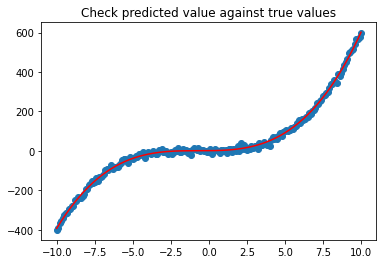

In [23]:
#visualze the predictions
import matplotlib.pyplot as plt
plt.scatter(x1,y)
plt.plot(x1,Yp,c='r')
plt.title("Check predicted value against true values")
plt.show()